In [3]:
import pandas as pd
import seaborn as sns 
import matplotlib .pyplot as plt
import numpy as np



In [5]:
data=pd.read_csv(r"C:\Users\mdfir\Downloads\placement (2).csv")

In [7]:
data.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [11]:
data.isnull().sum()

cgpa                    0
placement_exam_marks    0
placed                  0
dtype: int64

# outliers dections and remove 

<Axes: xlabel='placement_exam_marks', ylabel='Density'>

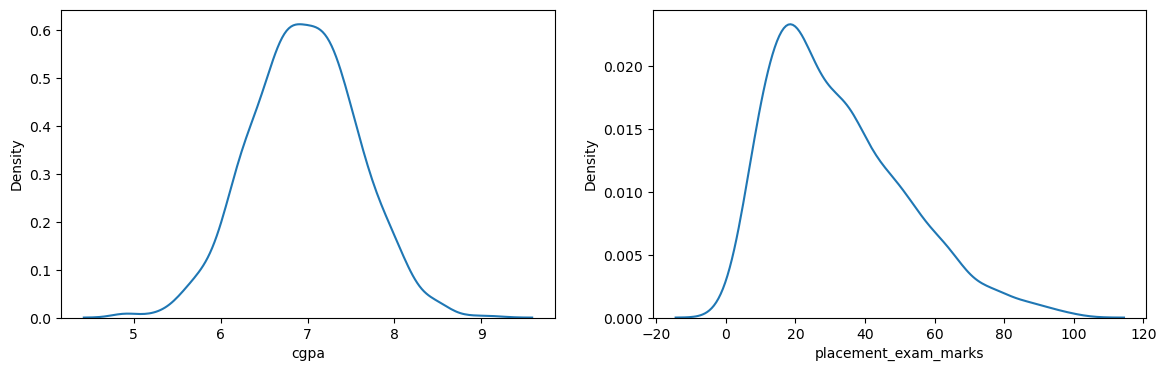

In [20]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.kdeplot(data["cgpa"])


plt.subplot(122)
sns.kdeplot(data["placement_exam_marks"])

# z-outliers removale apply in only cgpa

In [29]:
print("cgpa mean",data['cgpa'].mean())
print("cgpa std",data['cgpa'].std())
print("cgpa min",data['cgpa'].min())
print("cgpa max",data['cgpa'].max())

cgpa mean 6.96124
cgpa std 0.6158978751323894
cgpa min 4.89
cgpa max 9.12


# show the outliers higher and lower allowed (mean()+3std())

In [45]:
highest_allowed=(data["cgpa"].mean()) + (3*data["cgpa"].std())
lower_allowed=(data["cgpa"].mean()) - (3*data["cgpa"].std())

In [47]:
highest_allowed

8.808933625397168

In [49]:
lower_allowed

5.113546374602832

# find the outliers 

In [52]:
data[(data["cgpa"]>highest_allowed) | (data["cgpa"]<lower_allowed)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


# remove the outliers in trimming rule

In [59]:
new_data=data[(data["cgpa"]<highest_allowed) & (data["cgpa"]>lower_allowed)]

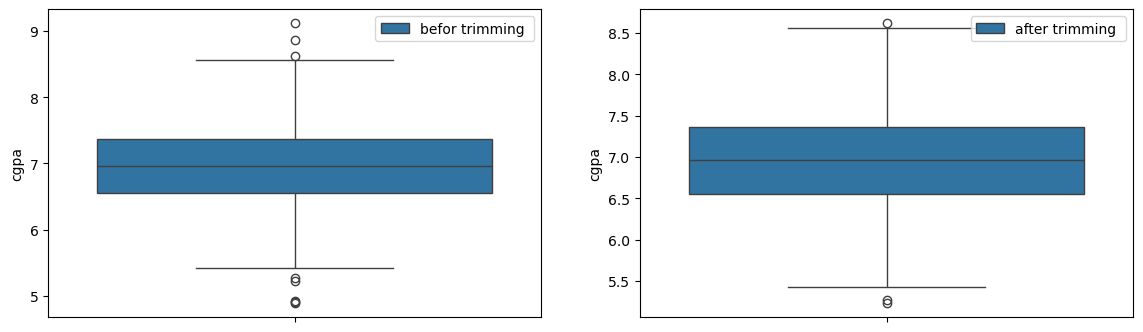

In [69]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.boxplot(data["cgpa"],label="befor trimming ")
plt.legend()

plt.subplot(122)
sns.boxplot(new_data["cgpa"],label="after trimming ")
plt.legend()

# capping (cpga) outliers 

In [71]:
higher_limit=(data["cgpa"].mean()) + (3*data["cgpa"].std())
lower_limit=(data["cgpa"].mean()) - (3*data["cgpa"].std())

In [88]:
data["cgpa"]=np.where(
    data["cgpa"]>higher_limit,
    higher_limit,
    np.where(data["cgpa"]<lower_limit,
        lower_limit,
            data["cgpa"]))

In [90]:
data["cgpa"].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64

<Axes: ylabel='cgpa'>

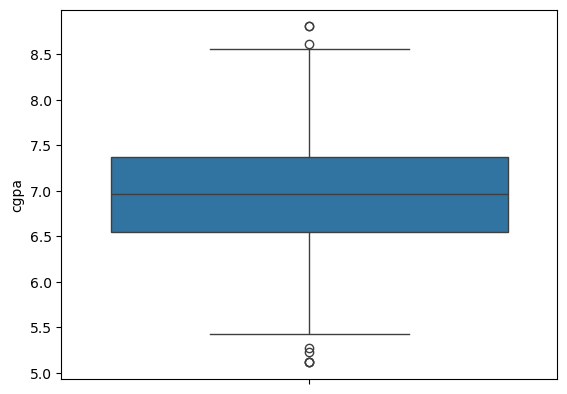

In [96]:
sns.boxplot(data["cgpa"])

In [100]:
check=data[(data["cgpa"]>higher_limit) | (data["cgpa"]<lower_limit)]